In [1]:
import math
import numpy
from matplotlib import pyplot
# помещаем графику внутрь блокнота
%matplotlib inline

In [2]:
def translate(x, y, c=1):
    z = x + y*1j
    ret = z + c**2/z
    return ret.real, ret.imag

def make_polar_grid(Nr, Nt, delta_x, delta_y, r=1, R=5, AoA=0):
    thetas = numpy.linspace(0, 2*math.pi, Nt)
    radiuses= numpy.linspace(r, R, Nr)
    T, R = numpy.meshgrid(thetas, radiuses)
    X = R * numpy.cos(T) + delta_x
    Y = R * numpy.sin(T) + delta_y
    return X, Y

In [3]:
Nr=100
Nt=145

In [4]:
X, Y = make_polar_grid(Nr, Nt, delta_x=0, delta_y=0, r=1.5, R=2.5)


In [5]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u = -strength / (2*math.pi)*((X-xd)**2-(Y-yd)**2)/((X-xd)**2+(Y-yd)**2)**2
    v = -strength / (2*math.pi)*2*(X-xd)*(Y-yd)/((X-xd)**2+(Y-yd)**2)**2
    return u, v
    
def get_stream_function_doublet(strength, xd, yd, X, Y):
    return -strength/(2*math.pi)*(Y-yd)/((X-xd)**2+(Y-yd)**2)

def get_velocity_freestream(s, u_inf, alpha):    
    u = u_inf * numpy.ones(shape=s) * numpy.cos(alpha)
    v = u_inf * numpy.ones(shape=s) * numpy.sin(alpha)   
    return u, v

def translate_velocities(u, v, z, c):
    ret = (u - v * 1j) / (1 - (c / z) ** 2)
    return ret.real, -ret.imag

def get_cp(U, V, u_inf):    
    return 1 - (U ** 2 + V ** 2) / u_inf ** 2

def rotate_grid(X0, Y0, AoA, x0, y0):   
    X = (X0 - x0) * numpy.cos(AoA) + (Y0 - y0) * numpy.sin(AoA)
    Y = (Y0 - y0) * numpy.cos(AoA) - (X0 - x0) * numpy.sin(AoA)
    return X, Y

def rotate_velocity(u0, v0, AoA):    
    u = u0 * numpy.cos(AoA) - v0 * numpy.sin(AoA)
    v = u0 * numpy.sin(AoA) + v0 * numpy.cos(AoA)
    return u, v

In [6]:
R = 1.15
c=1
u_inf = 1
kappa = R**2 * 2 * math.pi * u_inf
X,Y = make_polar_grid(Nr, Nt, c-R, 0, r=R, R=5)
X1, Y1 = translate(X, Y, c)

psi_freestream = u_inf*Y
psi_doublet = get_stream_function_doublet(kappa, c-R, 0, X, Y)
psi = psi_freestream + psi_doublet

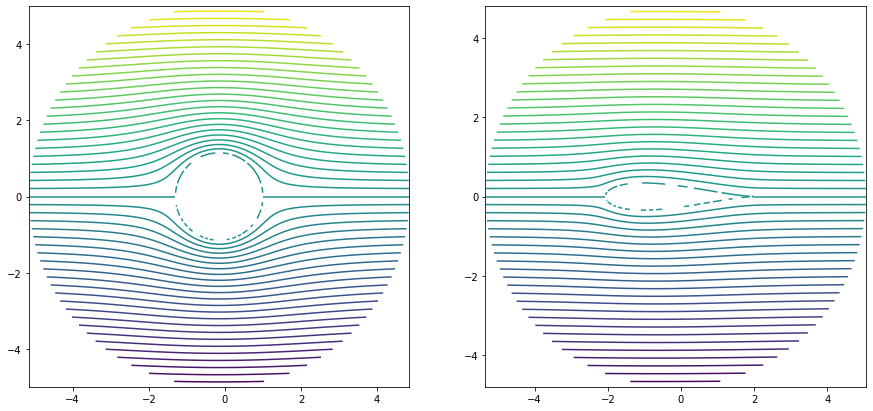

In [7]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 7))
axs[0].contour(X, Y, psi, levels=50)
axs[1].contour(X1, Y1, psi, levels=50)

In [8]:
u_doublet, v_doublet = get_velocity_doublet(kappa, c-R, 0, X, Y)
u_free, v_free = get_velocity_freestream((Nr, Nt), u_inf, 0)
u, v = u_doublet + u_free, v_doublet + v_free
u1, v1 = translate_velocities(u, v, X+Y*1j, c)

<ipython-input-5-6534badd8bd1>:15: RuntimeWarning: invalid value encountered in true_divide
  ret = (u - v * 1j) / (1 - (c / z) ** 2)


In [9]:
ro = 1

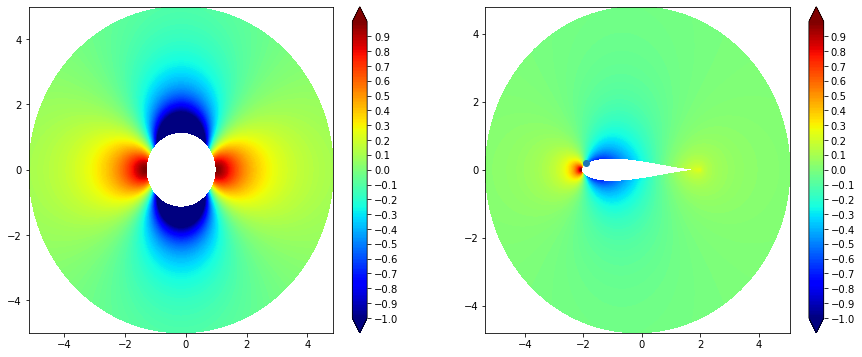

In [10]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 6))
cp = get_cp(u, v, u_inf)
cp1 = get_cp(u1, v1, u_inf)

c1 = axs[0].contourf(X, Y, cp, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')
c2 = axs[1].contourf(X1, Y1, cp1, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')

cbar = pyplot.colorbar(c1, ax=axs[0])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))
cbar = pyplot.colorbar(c2, ax=axs[1])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))

axs[1].scatter(X1[0][62], Y1[0][62])


In [11]:
p = 0.5*ro*cp
p = p[0][1:-1]
p1 = 0.5*ro*cp1
p1 = p1[0][1:-1]

x0 = X[0][1:-1]
y0 = Y[0][1:-1]
x1 = X1[0][1:-1]
y1 = Y1[0][1:-1]

lifting_force0 = 0
resistance0 = 0
lifting_force1 = 0
resistance1 = 0
for i in range(len(p) - 1):
    lifting_force0 -= (p[i]+p[i+1])/2*(x0[i] - x0[i+1])
    resistance0 -= (p[i]+p[i+1])/2*(y0[i] - y0[i+1])
    lifting_force1 -= (p1[i]+p1[i+1])/2*(x1[i] - x1[i+1])
    resistance1 -= (p1[i]+p1[i+1])/2*(y1[i] - y1[i+1])
print("Подъемная сила цилиндра: ", lifting_force0)
print("Подъемная сила профиля ", lifting_force1)
print("Сила сопротивления цилиндра: ", resistance0)
print("Сила сопротивления профиля: ", resistance1)

Подъемная сила цилиндра:  -7.504847437944662e-16
Подъемная сила профиля  -2.712673835558732e-16
Сила сопротивления цилиндра:  -0.049971412791461625
Сила сопротивления профиля:  6.695140001305087e-05


# With Angle

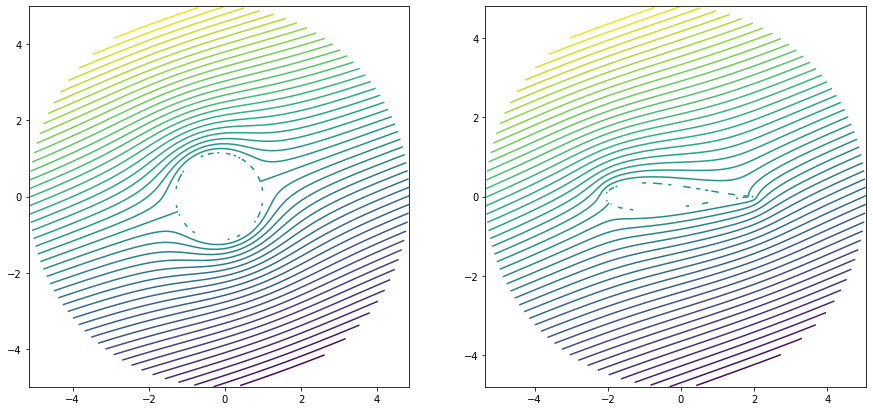

In [12]:
AoA = 20/180*math.pi
fig, axs = pyplot.subplots(1, 2, figsize=(15, 7))

Xr,Yr = rotate_grid(X,Y, AoA, c-R, 0)

psi = get_stream_function_doublet(-kappa, Xr, Yr, 0, 0) + u_inf*Yr

axs[0].contour(X, Y, psi, levels=50)
axs[1].contour(X1, Y1, psi, levels=50)


<ipython-input-5-6534badd8bd1>:15: RuntimeWarning: divide by zero encountered in true_divide
  ret = (u - v * 1j) / (1 - (c / z) ** 2)


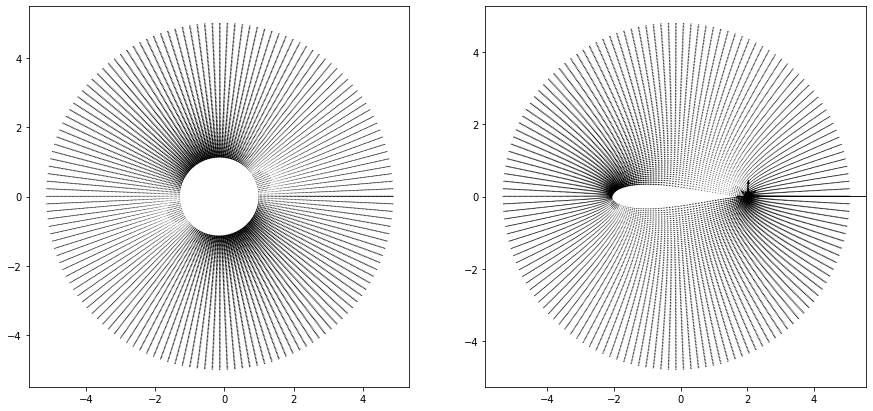

In [13]:
u, v = get_velocity_doublet(kappa, 0, 0, Xr, Yr)
q, w = get_velocity_freestream((Nr, Nt), u_inf, 0)
u+=q
v+=w
u, v = rotate_velocity(u, v, AoA)
u1, v1 = translate_velocities(u, v, X+Y*1j, c)
fig, axs = pyplot.subplots(1, 2, figsize=(15, 7))

axs[0].quiver(X, Y, u, v, scale=200)
axs[1].quiver(X1, Y1, u1, v1, scale=200)


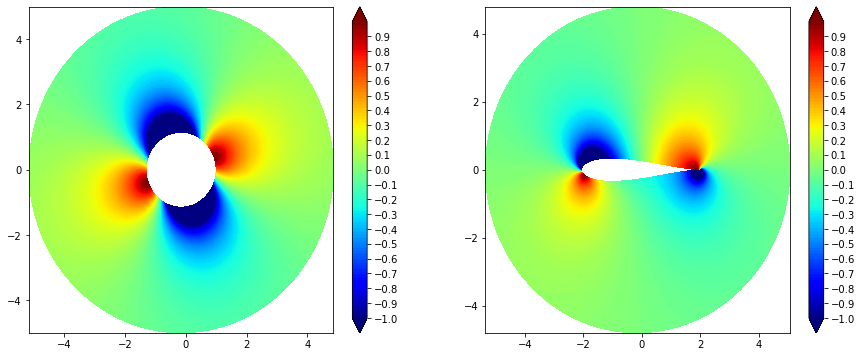

In [14]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 6))
cp = get_cp(u, v, u_inf)
cp1 = get_cp(u1, v1, u_inf)

c1 = axs[0].contourf(X, Y, cp, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')
c2 = axs[1].contourf(X1, Y1, cp1, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')
cbar = pyplot.colorbar(c1, ax=axs[0])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))
cbar = pyplot.colorbar(c2, ax=axs[1])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))

In [15]:
p = 0.5*ro*cp
p = p[0][1:-1]
p1 = 0.5*ro*cp1
p1 = p1[0][1:-1]

x0 = X[0][1:-1]
y0 = Y[0][1:-1]
x1 = X1[0][1:-1]
y1 = Y1[0][1:-1]

lifting_force0 = 0
resistance0 = 0
lifting_force1 = 0
resistance1 = 0
for i in range(len(p) - 1):
    lifting_force0 -= (p[i]+p[i+1])/2*((x0[i] - x0[i+1])*math.cos(AoA) + (y0[i] - y0[i+1])*math.sin(AoA))
    resistance0 += (p[i]+p[i+1])/2*((x0[i] - x0[i+1])*math.sin(AoA) - (y0[i] - y0[i+1])*math.cos(AoA))
    lifting_force1 -= (p1[i]+p1[i+1])/2*((x1[i] - x1[i+1])*math.cos(AoA) + (y1[i] - y1[i+1])*math.sin(AoA))
    resistance1 += (p1[i]+p1[i+1])/2*((x1[i] - x1[i+1])*math.sin(AoA) - (y1[i] - y1[i+1])*math.cos(AoA))
    
    
print("Подъемная сила цилиндра: ", lifting_force0)
print("Подъемная сила профиля ", lifting_force1)
print("Сила сопротивления цилиндра: ", resistance0)
print("Сила сопротивления профиля: ", resistance1)

Подъемная сила цилиндра:  -0.009021158157898269
Подъемная сила профиля  0.1657201123133171
Сила сопротивления цилиндра:  -0.024964713979354028
Сила сопротивления профиля:  0.33100929385148636


# With circulation

In [16]:
def vortex_intensity(x, R = 1.15, u_inf = 1):    
    return 4 * numpy.pi * u_inf * numpy.sqrt(R ** 2 - x ** 2)

def get_stream_vortex(kappa, x0, y0, X, Y):
    psi = kappa / (4 * numpy.pi) * numpy.log((X - x0) ** 2 + (Y - y0) ** 2)
    return psi

def get_vortex_velocity(gamma, x0, y0, X, Y):
    U = gamma / 2 / numpy.pi * (Y - y0) / ((X - x0) ** 2 + (Y - y0) ** 2)
    V = - gamma / 2 / numpy.pi * (X - x0) / ((X - x0) ** 2 + (Y - y0) ** 2)
    return U, V

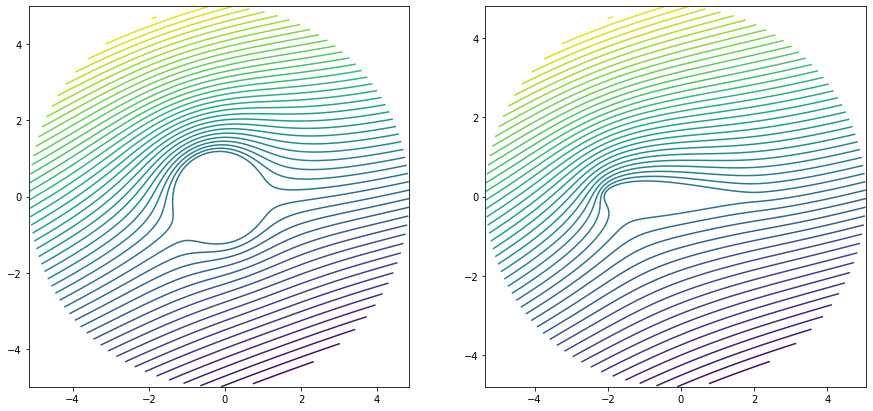

In [17]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 7))
x0, _ = rotate_grid(1, 0, AoA, c-R, 0)

# gamma = 4 * numpy.pi * u_inf * numpy.sqrt(R ** 2 - x0 ** 2)

gamma = 4*math.pi*u_inf*math.sin(AoA)*R

psi = get_stream_function_doublet(kappa, 0, 0, Xr, Yr) + get_stream_vortex(gamma, 0, 0, Xr, Yr) + u_inf*Yr

axs[0].contour(X, Y, psi, levels=50)
axs[1].contour(X1, Y1, psi, levels=50)


In [18]:
gamma = 4 * numpy.pi * u_inf * numpy.sqrt(R ** 2 - x0 ** 2)
gamma_theoretical = 4*math.pi*u_inf*math.sin(AoA)*R

<ipython-input-5-6534badd8bd1>:15: RuntimeWarning: divide by zero encountered in true_divide
  ret = (u - v * 1j) / (1 - (c / z) ** 2)


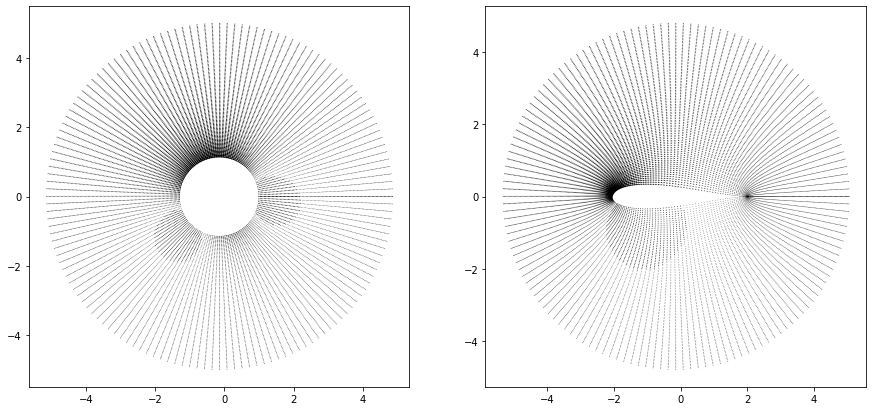

In [19]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 7))
u, v = get_velocity_doublet(kappa, 0, 0, Xr, Yr)
uv, vv = get_vortex_velocity(gamma, 0, 0, Xr, Yr)
uf, vf = get_velocity_freestream((Nr, Nt), u_inf, 0)
u = u+uv+uf
v = v+vv+vf
u, v = rotate_velocity(u, v, AoA)
u1, v1 = translate_velocities(u, v, X + Y * 1j, c)

axs[0].quiver(X,Y, u, v, scale=300)
axs[1].quiver(X1,Y1, u1, v1, scale=300)

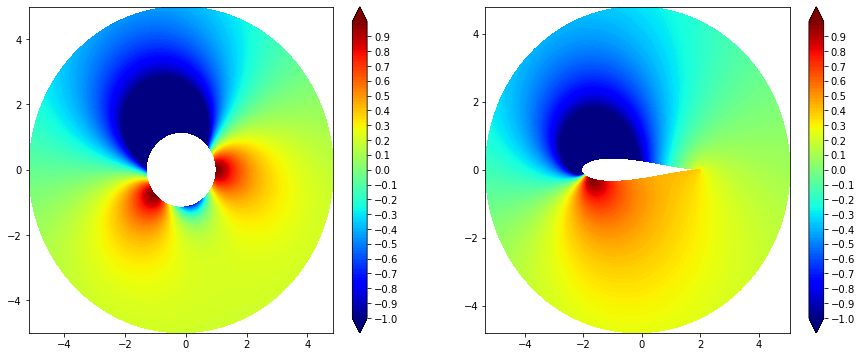

In [20]:
fig, axs = pyplot.subplots(1, 2, figsize=(15, 6))
cp = get_cp(u, v, u_inf)
cp1 = get_cp(u1, v1, u_inf)
c1 = axs[0].contourf(X, Y, cp, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')
c1 = axs[1].contourf(X1, Y1, cp1, levels=numpy.linspace(-1, 1, 200), extend='both', cmap='jet')
cbar = pyplot.colorbar(c1, ax=axs[0])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))
cbar = pyplot.colorbar(c2, ax=axs[1])
cbar.set_ticks(numpy.arange(-1, 1, 0.1))

# axs[1].scatter(xs[35], ys[35]) 

In [21]:
p = 0.5*ro*cp
p = p[0][1:-1]
p1 = 0.5*ro*cp1
p1 = p1[0][1:-1]

x0 = X[0][1:-1]
y0 = Y[0][1:-1]
x1 = X1[0][1:-1]
y1 = Y1[0][1:-1]

lifting_force0 = 0
resistance0 = 0
lifting_force1 = 0
resistance1 = 0
for i in range(len(p) - 1):
    lifting_force0 -= (p[i]+p[i+1])/2*((x0[i] - x0[i+1])*math.cos(AoA) + (y0[i] - y0[i+1])*math.sin(AoA))
    resistance0 -= (p[i]+p[i+1])/2*((x0[i] - x0[i+1])*math.sin(AoA) - (y0[i] - y0[i+1])*math.cos(AoA))
    lifting_force1 -= (p1[i]+p1[i+1])/2*((x1[i] - x1[i+1])*math.cos(AoA) + (y1[i] - y1[i+1])*math.sin(AoA))
    resistance1 -= (p1[i]+p1[i+1])/2*((x1[i] - x1[i+1])*math.sin(AoA) - (y1[i] - y1[i+1])*math.cos(AoA))
    
print("Подъемная сила цилиндра: ", lifting_force0)
print("Подъемная сила профиля ", lifting_force1)
print("Сила сопротивления цилиндра: ", resistance0)
print("Сила сопротивления профиля: ", resistance1)

Подъемная сила цилиндра:  4.923977542034683
Подъемная сила профиля  4.94126933519798
Сила сопротивления цилиндра:  0.04697872030650216
Сила сопротивления профиля:  0.0004863595526192122
